# GOOGLE STOCK PRICE PREDICTION USING LSTM MODEL

In [202]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import math
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.layers import LSTM


In [141]:
#Loading Dataset
df=pd.read_csv('GOOG.csv')

In [142]:
#loading head & tail
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.300003,24840000
1,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.410004,22580900
2,2022-10-05,100.690002,102.739998,99.739998,102.220001,102.220001,18475500
3,2022-10-06,101.500000,103.730003,101.500000,102.239998,102.239998,17156200
4,2022-10-07,100.650002,101.419998,99.209999,99.570000,99.570000,24249900


In [143]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-09-26,130.914001,131.404999,128.190002,129.449997,129.449997,20378800
247,2023-09-27,129.440002,131.720001,129.380005,131.460007,131.460007,18764200
248,2023-09-28,130.690002,134.179993,130.690002,133.130005,133.130005,18201400
249,2023-09-29,134.080002,134.889999,131.320007,131.850006,131.850006,23224200
250,2023-10-02,132.154999,135.360001,132.065002,135.169998,135.169998,19189000


In [149]:
data_training = df[df['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume


In [150]:
data_test = df[df['Date']>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.300003,24840000
1,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.410004,22580900
2,2022-10-05,100.690002,102.739998,99.739998,102.220001,102.220001,18475500
3,2022-10-06,101.500000,103.730003,101.500000,102.239998,102.239998,17156200
4,2022-10-07,100.650002,101.419998,99.209999,99.570000,99.570000,24249900
...,...,...,...,...,...,...,...
246,2023-09-26,130.914001,131.404999,128.190002,129.449997,129.449997,20378800
247,2023-09-27,129.440002,131.720001,129.380005,131.460007,131.460007,18764200
248,2023-09-28,130.690002,134.179993,130.690002,133.130005,133.130005,18201400
249,2023-09-29,134.080002,134.889999,131.320007,131.850006,131.850006,23224200


In [151]:
df.shape

(251, 7)

In [152]:
#Removing duplicate values
df = df.loc[~df.index.duplicated(keep='first')]

In [153]:
print('Total no. of days present in dataset:',df.shape[0])
print('Total no. of fields present in dataset:',df.shape[1])

Total no. of days present in dataset: 251
Total no. of fields present in dataset: 7


In [154]:
df.shape

(251, 7)

In [155]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.300003,24840000
1,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.410004,22580900
2,2022-10-05,100.690002,102.739998,99.739998,102.220001,102.220001,18475500
3,2022-10-06,101.500000,103.730003,101.500000,102.239998,102.239998,17156200
4,2022-10-07,100.650002,101.419998,99.209999,99.570000,99.570000,24249900


In [156]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.300003,24840000
1,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.410004,22580900
2,2022-10-05,100.690002,102.739998,99.739998,102.220001,102.220001,18475500
3,2022-10-06,101.500000,103.730003,101.500000,102.239998,102.239998,17156200
4,2022-10-07,100.650002,101.419998,99.209999,99.570000,99.570000,24249900
...,...,...,...,...,...,...,...
246,2023-09-26,130.914001,131.404999,128.190002,129.449997,129.449997,20378800
247,2023-09-27,129.440002,131.720001,129.380005,131.460007,131.460007,18764200
248,2023-09-28,130.690002,134.179993,130.690002,133.130005,133.130005,18201400
249,2023-09-29,134.080002,134.889999,131.320007,131.850006,131.850006,23224200


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [158]:
df.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,251,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
unique,251,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-10-03,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,109.362311,110.875104,108.213757,109.571574,109.571574,2.666822e+07
std,NaN,15.791147,15.829224,15.795351,15.806917,15.806917,1.108759e+07
min,NaN,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,NaN,95.759998,97.349998,94.470001,95.840000,95.840000,2.009725e+07
50%,NaN,105.230003,106.540001,104.209999,105.120003,105.120003,2.365610e+07
75%,NaN,123.972499,125.444999,122.895001,124.215000,124.215000,3.004110e+07


In [159]:
#checking null values
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [161]:
training_data = df.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,97.220001,99.970001,97.019997,99.300003,24840000
1,101.040001,102.720001,101.040001,102.410004,22580900
2,100.690002,102.739998,99.739998,102.220001,18475500
3,101.500000,103.730003,101.500000,102.239998,17156200
4,100.650002,101.419998,99.209999,99.570000,24249900


In [162]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.21961739, 0.25140503, 0.25046139, 0.28486492, 0.1823608 ],
       [0.2912603 , 0.30292246, 0.32465857, 0.34090097, 0.15704331],
       [0.28469617, 0.30329708, 0.30066443, 0.33747749, 0.11103453],
       ...,
       [0.84733683, 0.89228173, 0.87190842, 0.89441443, 0.10796272],
       [0.91091523, 0.90558271, 0.88353641, 0.87135139, 0.1642527 ],
       [0.8748124 , 0.91438754, 0.89728678, 0.93117105, 0.11903065]])

In [163]:
x_train = []
y_train = []

In [164]:
training_data.shape[0]

251

In [165]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [166]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [167]:
#rows,columns,dimensions
x_train.shape

(191, 60, 5)

In [168]:
y_train.shape

(191,)

## BUILDING LSTM MODEL

In [169]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, InputLayer

In [174]:
regressior = Sequential()


regressior.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.3))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.4))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.5))

regressior.add(Dense(units = 1))

In [175]:
regressior.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_19 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_20 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_23 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_21 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_24 (LSTM)              (None, 120)             

In [176]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [177]:
regressior.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6/6 [==============================] - 14s 260ms/step - loss: 0.2975
Epoch 2/10
6/6 [==============================] - 2s 261ms/step - loss: 0.0649
Epoch 3/10
6/6 [==============================] - 2s 270ms/step - loss: 0.0451
Epoch 4/10
6/6 [==============================] - 2s 270ms/step - loss: 0.0363
Epoch 5/10
6/6 [==============================] - 2s 264ms/step - loss: 0.0276
Epoch 6/10
6/6 [==============================] - 2s 268ms/step - loss: 0.0268
Epoch 7/10
6/6 [==============================] - 2s 255ms/step - loss: 0.0267
Epoch 8/10
6/6 [==============================] - 2s 258ms/step - loss: 0.0263
Epoch 9/10
6/6 [==============================] - 2s 259ms/step - loss: 0.0258
Epoch 10/10
6/6 [==============================] - 2s 256ms/step - loss: 0.0213


## PREPARING TEST DATASET

In [178]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,97.220001,99.970001,97.019997,99.300003,99.300003,24840000
1,2022-10-04,101.040001,102.720001,101.040001,102.410004,102.410004,22580900
2,2022-10-05,100.690002,102.739998,99.739998,102.220001,102.220001,18475500
3,2022-10-06,101.500000,103.730003,101.500000,102.239998,102.239998,17156200
4,2022-10-07,100.650002,101.419998,99.209999,99.570000,99.570000,24249900


In [179]:
data_training.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume


In [180]:
past_60_days = data_training.tail(60)

In [182]:
import pandas as pd
df = pd.concat([past_60_days, data_test], ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,97.220001,99.970001,97.019997,99.300003,24840000
1,101.040001,102.720001,101.040001,102.410004,22580900
2,100.690002,102.739998,99.739998,102.220001,18475500
3,101.500000,103.730003,101.500000,102.239998,17156200
4,100.650002,101.419998,99.209999,99.570000,24249900


In [183]:
inputs = scaler.transform(df)
inputs

array([[0.21961739, 0.25140503, 0.25046139, 0.28486492, 0.1823608 ],
       [0.2912603 , 0.30292246, 0.32465857, 0.34090097, 0.15704331],
       [0.28469617, 0.30329708, 0.30066443, 0.33747749, 0.11103453],
       ...,
       [0.84733683, 0.89228173, 0.87190842, 0.89441443, 0.10796272],
       [0.91091523, 0.90558271, 0.88353641, 0.87135139, 0.1642527 ],
       [0.8748124 , 0.91438754, 0.89728678, 0.93117105, 0.11903065]])

In [184]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [185]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((191, 60, 5), (191,))

In [186]:
y_pred = regressior.predict(x_test)

6/6 [==============================] - 2s 83ms/step


In [187]:
scaler.scale_

array([1.87546887e-02, 1.87336116e-02, 1.84569925e-02, 1.80180157e-02,
       1.12068927e-08])

In [189]:
scale = 1/1.87546887e-02
scale

53.319999920873116

In [190]:
y_pred = y_pred*scale
y_test = y_test*scale

In [191]:
y_pred

array([[13.686212],
       [13.391365],
       [13.075833],
       [12.747404],
       [12.414974],
       [12.086359],
       [11.766061],
       [11.457394],
       [11.163772],
       [10.888061],
       [10.633193],
       [10.403312],
       [10.202367],
       [10.033145],
       [ 9.897481],
       [ 9.795105],
       [ 9.727857],
       [ 9.701569],
       [ 9.723241],
       [ 9.792483],
       [ 9.908464],
       [10.070756],
       [10.276862],
       [10.522423],
       [10.803728],
       [11.122309],
       [11.478851],
       [11.87184 ],
       [12.299011],
       [12.744063],
       [13.177891],
       [13.574702],
       [13.91383 ],
       [14.181498],
       [14.37296 ],
       [14.49057 ],
       [14.54004 ],
       [14.527274],
       [14.457587],
       [14.336392],
       [14.168411],
       [13.959737],
       [13.717005],
       [13.447864],
       [13.161731],
       [12.869303],
       [12.58286 ],
       [12.313871],
       [12.071705],
       [11.861868],


In [192]:
y_test

array([ 1.989998  ,  1.519997  ,  1.854996  ,  4.31999999,  5.49999999,
        2.559998  ,  1.849999  ,  3.68499799,  1.209999  ,  4.54999599,
        6.88999999,  6.01799799,  7.26999699,  7.42999999,  5.87999699,
       10.43999498, 13.61999498, 14.04000098, 11.68999498, 12.76999698,
       13.54000098, 13.23500098, 12.34999898, 14.22999598, 21.27999897,
       17.99999997, 17.17499597, 18.11999497, 17.17999997, 15.02999898,
       10.22999598,  9.49999999,  9.15000199,  9.22999599, 10.02999899,
        9.55999799,  7.72999599,  6.42399599,  6.61999499,  4.11999499,
        4.57999399,  4.02999899,  4.65000199,  4.34999899,  7.22999599,
        8.84999899,  9.90999599,  8.89499699,  8.97999599,  6.98999799,
        5.05499999,  7.55999799,  8.02999899, 11.05999798, 15.32999398,
       15.54999598, 16.47000098, 19.62999697, 20.37999697, 20.22999597,
       19.80999797, 17.48999797, 17.20999897, 15.92999998, 16.19999698,
       17.15999597, 19.32999397, 20.61000097, 20.25999497, 21.87

## VISUALIZATION OF THE STOCK PRICE

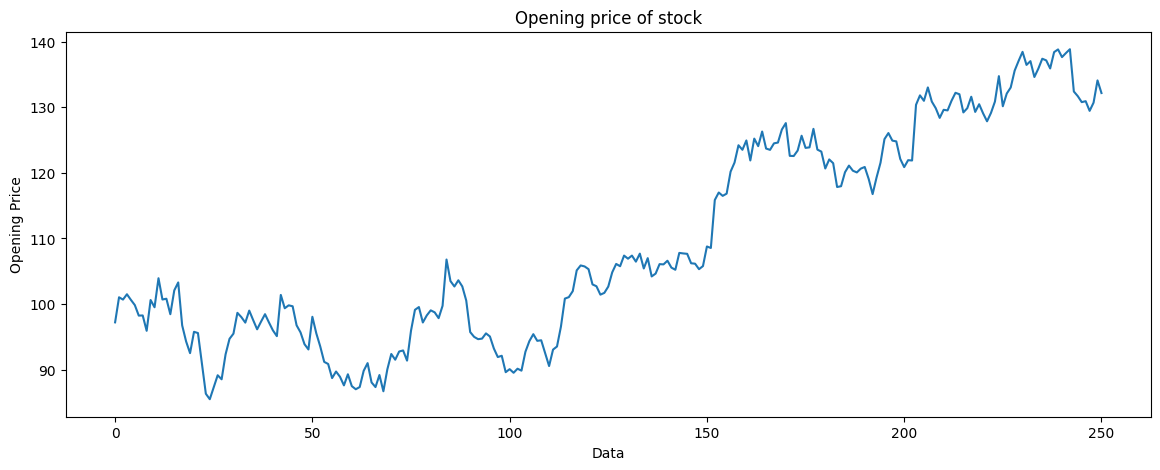

In [211]:
#visualizing the opening prices
plt.figure(figsize=(14,5))
plt.title('Opening price of stock')
plt.plot(df["Open"])
plt.xlabel('Data')
plt.ylabel('Opening Price')
plt.show()

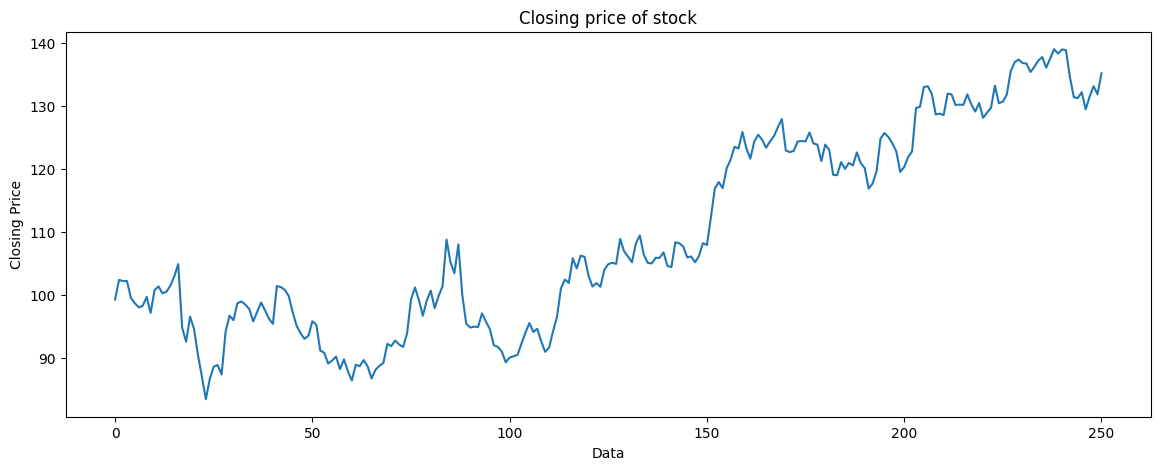

In [210]:
#visualizing the closing prices
plt.figure(figsize=(14,5))
plt.title('Closing price of stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.show()

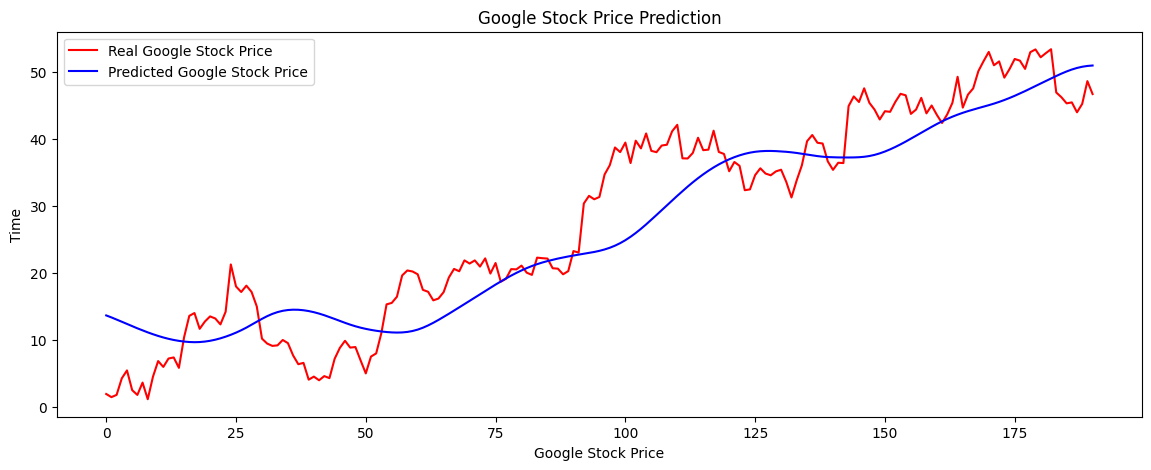

In [209]:
#visualizing the real stock price and predicted stock price
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label= 'Real Google Stock Price')
plt.plot(y_pred, color='blue', label= 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Google Stock Price')
plt.ylabel('Time')
plt.legend()
plt.show()